<a href="https://colab.research.google.com/github/ridho-128/pemerograman-dasar/blob/main/tugas_pertemuan_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/orders.csv')

# Ringkasan statistik
df.describe()

# Rata-rata 'payment'
rata_rata_payment = df['payment'].mean()
print("Rata-rata payment:", rata_rata_payment)

# Modus 'payment'
modus_payment = df['payment'].mode()
print("Modus payment:", modus_payment)

Rata-rata payment: 33972.936
Modus payment: 0    18355
1    37440
2    37821
3    37878
4    41180
Name: payment, dtype: int64


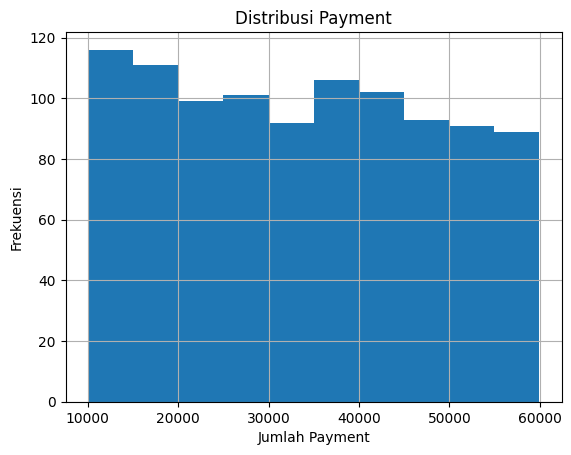

In [7]:
import matplotlib.pyplot as plt

df['payment'].hist()
plt.title("Distribusi Payment")
plt.xlabel("Jumlah Payment")
plt.ylabel("Frekuensi")
plt.show()

In [10]:
# Korelasi
corr_matrix = df[['payment', 'customer_id']].corr()
print("Korelasi:\n", corr_matrix)

# Kovarian
cov_matrix = df[['payment', 'customer_id']].cov()
print("Kovarian:\n", cov_matrix)

Korelasi:
               payment  customer_id
payment      1.000000    -0.018983
customer_id -0.018983     1.000000
Kovarian:
                   payment   customer_id
payment      2.088490e+08 -76020.677718
customer_id -7.602068e+04  76793.001401


In [12]:
# Menambah kolom kategori berdasarkan 'payment'
df['Kategori_Payment'] = df['payment'].apply(lambda x: 'Tinggi' if x >= df['payment'].mean() else 'Rendah')
df

# Rata-rata customer_id per kategori payment
group_mean = df.groupby('Kategori_Payment')['customer_id'].mean()
print(group_mean)

# Agregasi lengkap
group_agg = df.groupby('Kategori_Payment').agg({
    'payment': ['mean', 'max'],
    'customer_id': ['mean', 'count']
})
group_agg

Kategori_Payment
Rendah    507.724206
Tinggi    505.538306
Name: customer_id, dtype: float64


payment        customer_id      
                          mean    max        mean count
Kategori_Payment                                       
Rendah            21553.634921  33908  507.724206   504
Tinggi            46592.548387  59910  505.538306   496